In [4]:
import time

import pandas as pd
import geopy as gpx

from create_dataset import df_vf_idf_filtered

FileNotFoundError: [Errno 2] No such file or directory: 'data/ValeursFoncieres-2020-S2.txt'

## Import des DB

In [5]:
df = pd.read_csv("/Users/antoninbenard/PycharmProjects/land_value_prediction/data/idf_immobilier_filled_arrondissements.csv")

In [5]:
df.head()

,code_commune,annee,trimestre,prix_m2_median,surface_median,nb_transactions,type_bien_mode,inflation,dist_gare_km,gares_1km,...,dist_metro_km,metros_500m,metros_1km,prix_m2_median_dvf,surface_median_dvf,nb_transactions_dvf,pieces_median,surface_terrain_median,lots_median,type_bien_mode_dvf
0,77001,2020.0,1.0,2708.333333,120.0,4,maison,1.366667,10.027567,0,...,44.065166,0,0,328600.0,120.0,5.0,5.0,639.0,0.0,Maison
1,77001,2020.0,2.0,2407.407407,135.0,1,maison,0.333333,10.027567,0,...,44.065166,0,0,100000.0,135.0,3.0,5.0,866.0,0.0,Maison
2,77001,2020.0,3.0,1857.142857,77.0,1,appartement,0.366667,10.027567,0,...,44.065166,0,0,264000.0,77.0,11.0,3.0,480.5,0.0,Appartement
3,77001,2020.0,4.0,2121.212121,132.0,1,appartement,0.100000,10.027567,0,...,44.065166,0,0,13700.0,132.0,17.0,5.0,658.5,0.0,Appartement
4,77001,2021.0,1.0,3039.062500,96.0,7,maison,1.000000,10.027567,0,...,44.065166,0,0,430000.0,43.5,19.0,1.5,786.0,0.0,Dépendance


In [13]:
df.shape

(20332, 23)

In [6]:
df_vf_idf = pd.read_csv("/Users/antoninbenard/PycharmProjects/land_value_prediction/data/df_vf_idf.csv")

/var/folders/b3/k29r132d0bzbxz79ssnwqzrr0000gn/T/ipykernel_1527/970827985.py:1: DtypeWarning: Columns (16,18,20,22,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df_vf_idf = pd.read_csv("/Users/antoninbenard/PycharmProjects/land_value_prediction/data/df_vf_idf.csv")


In [18]:
df_vf_idf.head()

,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,...,trimestre,annee_trimestre,prix_m2,quartier,arrondissement,quartier_detaille,prix_median_m2,ecart_prix_median_pct,Latitude,Longitude
0,2020-07-01,Vente,246600.0,40.0,NaN,SEN,0500,DES LONGUES RAIES,77670.0,SAINT-MAMMES,...,3,2020-T3,2348.571429,SAINT-MAMMES (77670.0),NaN,SAINT-MAMMES (77670.0),2502.013809,-6.132755,48.382708,2.814988
1,2020-07-01,Vente,290000.0,31.0,NaN,RUE,0630,PDT DOUMER,95130.0,FRANCONVILLE LA GARENNE,...,3,2020-T3,5686.274510,FRANCONVILLE LA GARENNE (95130.0),NaN,FRANCONVILLE LA GARENNE (95130.0),3270.270270,73.877816,48.988578,2.239626
2,2020-07-01,Vente,165000.0,6.0,NaN,RUE,0077,ANNE FRANCK,95130.0,FRANCONVILLE LA GARENNE,...,3,2020-T3,2538.461538,FRANCONVILLE LA GARENNE (95130.0),NaN,FRANCONVILLE LA GARENNE (95130.0),3270.270270,-22.377622,None,None
3,2020-07-01,Vente,230000.0,38.0,NaN,AV,0150,DE CEINTURE,95880.0,ENGHIEN LES BAINS,...,3,2020-T3,2987.012987,ENGHIEN LES BAINS (95880.0),NaN,ENGHIEN LES BAINS (95880.0),5704.909091,-47.641357,48.971687,2.302966
4,2020-07-01,Vente,124000.0,130.0,NaN,RUE,0695,DE LA STATION,95130.0,FRANCONVILLE LA GARENNE,...,3,2020-T3,4769.230769,FRANCONVILLE LA GARENNE (95130.0),NaN,FRANCONVILLE LA GARENNE (95130.0),3270.270270,45.835982,48.989983,2.233447


In [14]:
df_vf_idf.shape

(878044, 45)

In [7]:
from geopy.geocoders import Nominatim

# Créer les colonnes Latitude et Longitude si elles n'existent pas
if 'Latitude' not in df_vf_idf.columns:
    df_vf_idf['Latitude'] = None
if 'Longitude' not in df_vf_idf.columns:
    df_vf_idf['Longitude'] = None

geolocator = Nominatim(user_agent="http")

for i in range(len(df_vf_idf)):
    # Construire l'adresse à partir des colonnes disponibles

    time_sleep = 1
    time.sleep(time_sleep)
    adresse_parts = [
        str(df_vf_idf.loc[i, 'No voie']) if pd.notna(df_vf_idf.loc[i, 'No voie']) else '',
        str(df_vf_idf.loc[i, 'Voie']) if pd.notna(df_vf_idf.loc[i, 'Voie']) else '',
        str(df_vf_idf.loc[i, 'Code postal']) if pd.notna(df_vf_idf.loc[i, 'Code postal']) else '',
        str(df_vf_idf.loc[i, 'Commune']) if pd.notna(df_vf_idf.loc[i, 'Commune']) else ''
    ]
    adresse = ' '.join([part for part in adresse_parts if part])

    if adresse and pd.isna(df_vf_idf.loc[i, 'Latitude']):
        try:
            location = geolocator.geocode(adresse)
            if location:
                df_vf_idf.loc[i, 'Latitude'] = location.latitude
                df_vf_idf.loc[i, 'Longitude'] = location.longitude
        except Exception as e:
            print(f"Erreur ligne {i}: {e}")


Erreur ligne 191: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=32.0+DE+VAUGIRARD+75015.0+PARIS+15&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
Erreur ligne 419: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=164.0+PASTEUR+93150.0+LE+BLANC-MESNIL&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
Erreur ligne 810: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=3.0+CLAUDE+DEBUSSY+92230.0+GENNEVILLIERS&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
Erreur ligne 811: HTTPSConnectionPool(host='nominati

KeyboardInterrupt: 

In [25]:
import pandas as pd
import requests
import io
import time
from tqdm import tqdm

def geocoder_ban_csv_direct(df, colonnes_adresse=['No voie', 'Voie', 'Code postal', 'Commune']):
    """
    Géocode un DataFrame via l'API BAN CSV (méthode officielle)

    Args:
        df: DataFrame à géocoder
        colonnes_adresse: Colonnes pour construire l'adresse

    Returns:
        DataFrame géocodé
    """

    print(f"\n{'='*70}")
    print(f"🚀 GÉOCODAGE VIA API BAN CSV")
    print(f"{'='*70}")
    print(f"📊 Total de lignes : {len(df):,}")
    print(f"{'='*70}\n")

    # Préparer les données
    df_temp = df.copy()
    df_temp['adresse_complete'] = ''

    for col in colonnes_adresse:
        if col in df_temp.columns:
            df_temp['adresse_complete'] += df_temp[col].fillna('').astype(str) + ' '

    df_temp['adresse_complete'] = df_temp['adresse_complete'].str.strip()
    df_temp['id_ligne'] = range(len(df_temp))

    # Filtrer les adresses à géocoder
    mask = (df_temp['adresse_complete'] != '')
    if 'Latitude' in df_temp.columns:
        mask = mask & df_temp['Latitude'].isna()

    df_a_geocoder = df_temp[mask][['id_ligne', 'adresse_complete']].copy()

    print(f"📋 Adresses à géocoder : {len(df_a_geocoder):,}")

    if len(df_a_geocoder) == 0:
        print("✅ Aucune adresse à géocoder !")
        return df

    # Préparer le CSV
    csv_buffer = io.StringIO()
    df_a_geocoder.to_csv(csv_buffer, index=False)
    csv_content = csv_buffer.getvalue()

    # Vérifier la taille
    taille_mb = len(csv_content.encode('utf-8')) / (1024 * 1024)
    print(f"📦 Taille du fichier : {taille_mb:.2f} MB")

    if taille_mb > 50:
        print(f"⚠️  Fichier trop volumineux ! Utiliser la fonction avec découpage.")
        return df

    # Envoyer à l'API
    url = "https://api-adresse.data.gouv.fr/search/csv/"

    files = {
        'data': ('adresses.csv', csv_content, 'text/csv')
    }

    # Paramètres importants
    data = {
        'columns': ['adresse_complete'],
        'result_columns': [
            'result_label',
            'result_score',
            'latitude',
            'longitude',
            'result_type',
            'result_city',
            'result_postcode'
        ]
    }

    print(f"⏳ Envoi à l'API BAN...")
    start_time = time.time()

    try:
        response = requests.post(url, files=files, data=data, timeout=300)
        response.raise_for_status()

        elapsed = time.time() - start_time
        print(f"✅ Réponse reçue en {elapsed:.1f} secondes")

        # Lire les résultats
        df_result = pd.read_csv(io.StringIO(response.text))

        # Ajouter les colonnes si nécessaire
        if 'Latitude' not in df.columns:
            df['Latitude'] = None
        if 'Longitude' not in df.columns:
            df['Longitude'] = None
        if 'geocode_score' not in df.columns:
            df['geocode_score'] = None
        if 'geocode_adresse_trouvee' not in df.columns:
            df['geocode_adresse_trouvee'] = None

        # Fusionner les résultats (score >= 0.5)
        bons_resultats = df_result[df_result['result_score'] >= 0.5].copy()

        for idx, row in bons_resultats.iterrows():
            id_original = int(row['id_ligne'])
            df.loc[id_original, 'Latitude'] = row['latitude']
            df.loc[id_original, 'Longitude'] = row['longitude']
            df.loc[id_original, 'geocode_score'] = row['result_score']
            df.loc[id_original, 'geocode_adresse_trouvee'] = row['result_label']

        # Statistiques
        total_traites = len(df_result)
        total_reussis = len(bons_resultats)

        print(f"\n{'='*70}")
        print(f"✅ GÉOCODAGE TERMINÉ")
        print(f"{'='*70}")
        print(f"⏱️  Temps total : {elapsed:.1f} secondes")
        print(f"⚡ Vitesse : {len(df_a_geocoder)/elapsed:.0f} adresses/seconde")
        print(f"📊 Adresses traitées : {total_traites:,}")
        print(f"✅ Géocodages réussis (score >= 0.5) : {total_reussis:,} ({total_reussis/total_traites*100:.1f}%)")
        print(f"⚠️  Échecs/Incertains : {total_traites - total_reussis:,}")

        if len(bons_resultats) > 0:
            print(f"\n📈 Score moyen : {bons_resultats['result_score'].mean():.3f}")
            print(f"📈 Score médian : {bons_resultats['result_score'].median():.3f}")

        print(f"{'='*70}\n")

        return df

    except requests.exceptions.Timeout:
        print(f"⏱️  Timeout après {time.time() - start_time:.1f} secondes")
        print(f"💡 Essayez avec un DataFrame plus petit")
        return df

    except Exception as e:
        print(f"❌ Erreur : {e}")
        return df


def geocoder_ban_par_lots(df, colonnes_adresse=['No voie', 'Voie', 'Code postal', 'Commune'],
                         taille_lot=20000):
    """
    Géocode un gros DataFrame en le divisant en lots
    Limite recommandée : 20 000 - 30 000 lignes par lot

    Args:
        df: DataFrame à géocoder
        colonnes_adresse: Colonnes pour l'adresse
        taille_lot: Taille de chaque lot

    Returns:
        DataFrame géocodé
    """

    nb_lignes = len(df)
    nb_lots = (nb_lignes // taille_lot) + (1 if nb_lignes % taille_lot > 0 else 0)

    if nb_lots == 1:
        return geocoder_ban_csv_direct(df, colonnes_adresse)

    print(f"\n{'='*70}")
    print(f"📦 GÉOCODAGE PAR LOTS")
    print(f"{'='*70}")
    print(f"📊 Total : {nb_lignes:,} lignes")
    print(f"📦 Nombre de lots : {nb_lots}")
    print(f"📏 Taille des lots : {taille_lot:,}")
    print(f"{'='*70}\n")

    df_result = df.copy()

    for i in range(nb_lots):
        debut = i * taille_lot
        fin = min((i + 1) * taille_lot, nb_lignes)

        print(f"\n{'='*70}")
        print(f"📦 LOT {i+1}/{nb_lots} - Lignes {debut:,} à {fin:,}")
        print(f"{'='*70}")

        df_lot = df_result.iloc[debut:fin].copy()
        df_lot_geocode = geocoder_ban_csv_direct(df_lot, colonnes_adresse)

        # Mettre à jour le DataFrame principal
        cols_a_copier = ['Latitude', 'Longitude', 'geocode_score', 'geocode_adresse_trouvee']
        for col in cols_a_copier:
            if col in df_lot_geocode.columns:
                df_result.loc[df_lot.index, col] = df_lot_geocode[col]

        # Pause entre les lots
        if i < nb_lots - 1:
            print("\n⏸️  Pause de 2 secondes avant le prochain lot...")
            time.sleep(2)

    # Statistiques globales
    total_geocode = df_result['Latitude'].notna().sum()

    print(f"\n{'='*70}")
    print(f"🎉 GÉOCODAGE GLOBAL TERMINÉ")
    print(f"{'='*70}")
    print(f"📊 Total d'adresses géocodées : {total_geocode:,} / {nb_lignes:,}")
    print(f"✅ Taux de réussite : {total_geocode/nb_lignes*100:.1f}%")
    print(f"{'='*70}\n")

    return df_result

In [ ]:
# TEST SUR 1 SEUL LOT (20 000 premières lignes)
print("🧪 TEST SUR 1 LOT AVANT DE LANCER SUR LES 44")
print("="*70)

df_vf_idf_test = geocoder_ban_par_lots(df_vf_idf, taille_lot=20000, colonnes_adresse=['No voie', 'Voie', 'Code postal', 'Commune'])


# Afficher un échantillon des résultats
print("\n📊 ÉCHANTILLON DES RÉSULTATS:")
print(df_vf_idf_test[['No voie','Voie', 'Code postal', 'Commune', 'Latitude', 'Longitude', 'geocode_score']].head(10))

# Statistiques
nb_geocodes = df_vf_idf_test['Latitude'].notna().sum()
print(f"\n✅ {nb_geocodes:,} adresses géocodées sur {len(df_vf_idf_test):,}")
print(f"📊 Taux de réussite: {nb_geocodes/len(df_vf_idf_test)*100:.1f}%")

print("\n💡 Si les résultats sont satisfaisants, lancez le géocodage complet avec:")
print("df_vf_idf = geocoder_ban_par_lots(df_vf_idf, taille_lot=20000)")

🧪 TEST SUR 1 LOT AVANT DE LANCER SUR LES 44

📦 GÉOCODAGE PAR LOTS
📊 Total : 878,044 lignes
📦 Nombre de lots : 44
📏 Taille des lots : 20,000


📦 LOT 1/44 - Lignes 0 à 20,000

🚀 GÉOCODAGE VIA API BAN CSV
📊 Total de lignes : 20,000

📋 Adresses à géocoder : 1,324
📦 Taille du fichier : 0.05 MB
⏳ Envoi à l'API BAN...
✅ Réponse reçue en 12.3 secondes

✅ GÉOCODAGE TERMINÉ
⏱️  Temps total : 12.3 secondes
⚡ Vitesse : 108 adresses/seconde
📊 Adresses traitées : 1,324
✅ Géocodages réussis (score >= 0.5) : 0 (0.0%)
⚠️  Échecs/Incertains : 1,324


⏸️  Pause de 2 secondes avant le prochain lot...

📦 LOT 2/44 - Lignes 20,000 à 40,000

🚀 GÉOCODAGE VIA API BAN CSV
📊 Total de lignes : 20,000

📋 Adresses à géocoder : 20,000
📦 Taille du fichier : 0.85 MB
⏳ Envoi à l'API BAN...


## Predictions Linéaire

In [18]:
# Notebook : Régression Linéaire Simple
# Prévision des prix au m² immobilier

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# =============================================================================
# 1. PRÉPARATION DES DONNÉES
# =============================================================================

# Sélection des features pertinentes pour un premier modèle
features_numeriques = [
    'surface_median',
    'nb_transactions',
    'inflation',
    'dist_gare_km',
    'gares_1km',
    'gares_2km',
    'dist_metro_km',
    'metros_500m',
    'metros_1km',
    'annee',
    'trimestre'
]

# Variable cible
target = 'prix_m2_median'

# Copie du dataframe et gestion des valeurs manquantes
df_model = df.copy()
print(f"Shape initial : {df_model.shape}")
print(f"\nValeurs manquantes par colonne :\n{df_model[features_numeriques + [target]].isnull().sum()}")

# Suppression des lignes avec valeurs manquantes
df_model = df_model.dropna(subset=features_numeriques + [target])
print(f"\nShape après nettoyage : {df_model.shape}")

# Séparation features / target
X = df_model[features_numeriques]
y = df_model[target]



Shape initial : (20332, 23)

Valeurs manquantes par colonne :
surface_median       0
nb_transactions      0
inflation          648
dist_gare_km         0
gares_1km            0
gares_2km            0
dist_metro_km        0
metros_500m          0
metros_1km           0
annee                0
trimestre            0
prix_m2_median       0
dtype: int64

Shape après nettoyage : (19684, 23)


In [19]:
# =============================================================================
# 2. SPLIT TRAIN/TEST (80/20)
# =============================================================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print(f"\nTaille train : {X_train.shape}")
print(f"Taille test : {X_test.shape}")



Taille train : (15747, 11)
Taille test : (3937, 11)


In [20]:
# =============================================================================
# 3. STANDARDISATION DES FEATURES
# =============================================================================

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
# =============================================================================
# 4. ENTRAÎNEMENT DU MODÈLE
# =============================================================================

model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("\n" + "="*60)
print("MODÈLE ENTRAÎNÉ")
print("="*60)



MODÈLE ENTRAÎNÉ


In [22]:
# =============================================================================
# 5. PRÉDICTIONS
# =============================================================================

y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)


In [23]:
# =============================================================================
# 6. ÉVALUATION DES PERFORMANCES
# =============================================================================

def evaluer_modele(y_true, y_pred, dataset_name=""):
    """Calcule et affiche les métriques de performance"""
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print(f"\n{dataset_name}")
    print(f"  RMSE : {rmse:.2f} €/m²")
    print(f"  MAE  : {mae:.2f} €/m²")
    print(f"  R²   : {r2:.4f}")
    print(f"  MAPE : {mape:.2f}%")

    return {'rmse': rmse, 'mae': mae, 'r2': r2, 'mape': mape}

# Évaluation
metrics_train = evaluer_modele(y_train, y_pred_train, "📊 TRAIN")
metrics_test = evaluer_modele(y_test, y_pred_test, "📊 TEST")


📊 TRAIN
  RMSE : 1277.09 €/m²
  MAE  : 825.77 €/m²
  R²   : 0.3562
  MAPE : 139453.98%

📊 TEST
  RMSE : 1300.71 €/m²
  MAE  : 844.31 €/m²
  R²   : 0.3318
  MAPE : 218565.81%


In [24]:

# =============================================================================
# 7. ANALYSE DES COEFFICIENTS
# =============================================================================

print("\n" + "="*60)
print("IMPORTANCE DES VARIABLES")
print("="*60)

coefficients = pd.DataFrame({
    'Feature': features_numeriques,
    'Coefficient': model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print(coefficients.to_string(index=False))


IMPORTANCE DES VARIABLES
        Feature  Coefficient
  dist_metro_km  -595.953906
     metros_1km   263.124461
      gares_2km   245.368945
    metros_500m   152.852157
      inflation   105.681622
 surface_median   -95.717454
nb_transactions    64.874784
      gares_1km    56.126676
   dist_gare_km    53.870855
          annee   -40.206875
      trimestre    15.143783


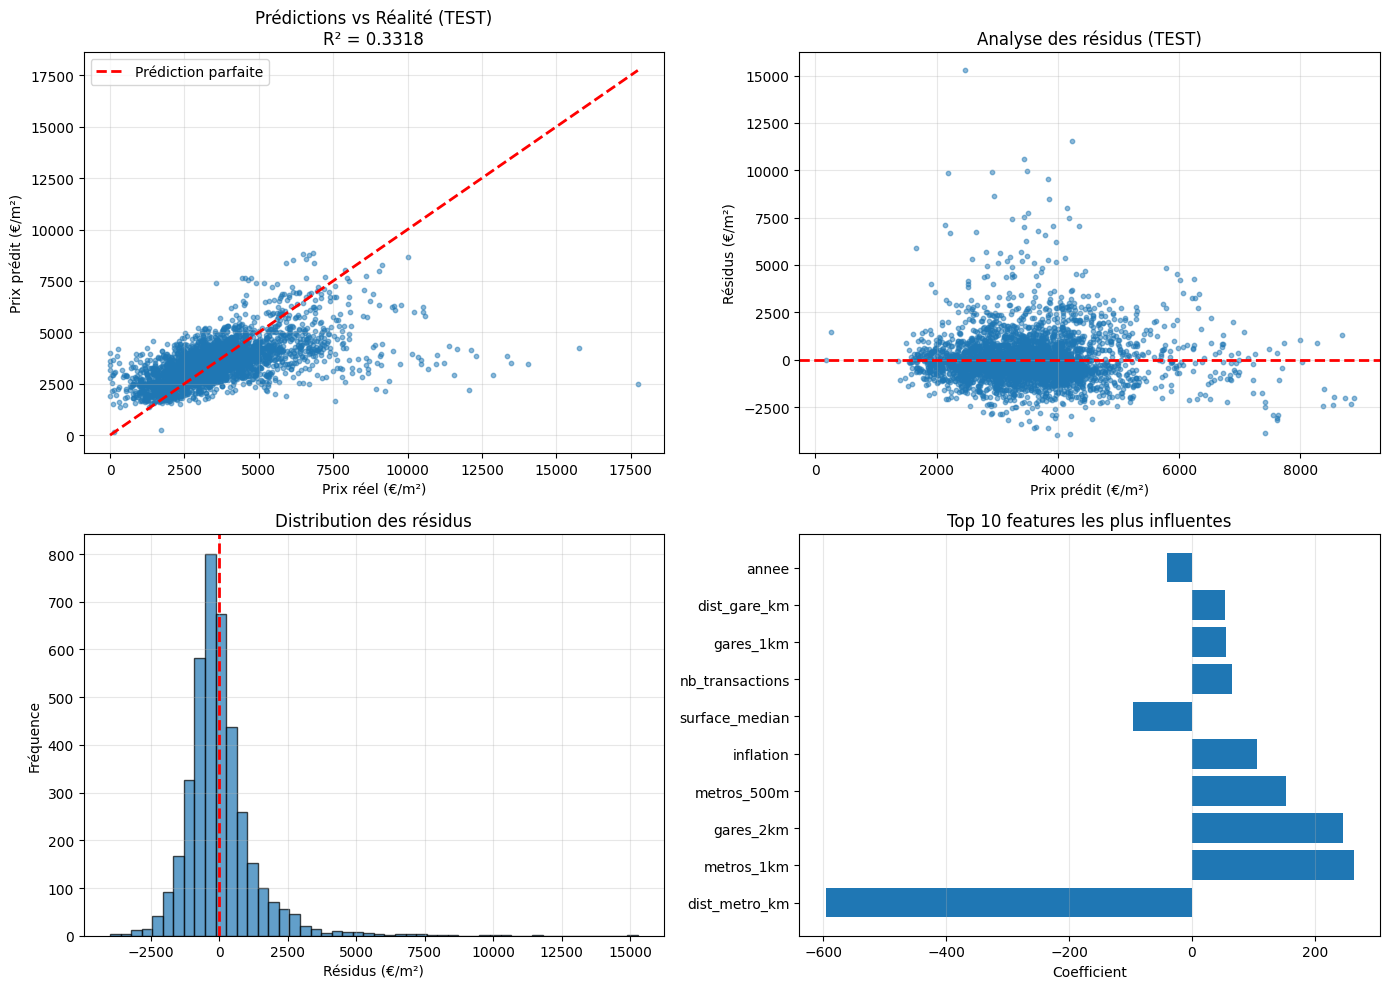

In [25]:
# =============================================================================
# 8. VISUALISATIONS
# =============================================================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 8.1 Valeurs réelles vs prédictions (TEST)
axes[0, 0].scatter(y_test, y_pred_test, alpha=0.5, s=10)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                'r--', lw=2, label='Prédiction parfaite')
axes[0, 0].set_xlabel('Prix réel (€/m²)')
axes[0, 0].set_ylabel('Prix prédit (€/m²)')
axes[0, 0].set_title(f'Prédictions vs Réalité (TEST)\nR² = {metrics_test["r2"]:.4f}')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 8.2 Résidus
residus = y_test - y_pred_test
axes[0, 1].scatter(y_pred_test, residus, alpha=0.5, s=10)
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Prix prédit (€/m²)')
axes[0, 1].set_ylabel('Résidus (€/m²)')
axes[0, 1].set_title('Analyse des résidus (TEST)')
axes[0, 1].grid(alpha=0.3)

# 8.3 Distribution des résidus
axes[1, 0].hist(residus, bins=50, edgecolor='black', alpha=0.7)
axes[1, 0].axvline(x=0, color='r', linestyle='--', lw=2)
axes[1, 0].set_xlabel('Résidus (€/m²)')
axes[1, 0].set_ylabel('Fréquence')
axes[1, 0].set_title('Distribution des résidus')
axes[1, 0].grid(alpha=0.3)

# 8.4 Importance des coefficients
top_features = coefficients.head(10)
axes[1, 1].barh(range(len(top_features)), top_features['Coefficient'])
axes[1, 1].set_yticks(range(len(top_features)))
axes[1, 1].set_yticklabels(top_features['Feature'])
axes[1, 1].set_xlabel('Coefficient')
axes[1, 1].set_title('Top 10 features les plus influentes')
axes[1, 1].grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()


In [26]:

# =============================================================================
# 9. SAUVEGARDE POUR RÉUTILISATION
# =============================================================================

print("\n" + "="*60)
print("✅ Modèle baseline créé !")
print("="*60)
print("\nÀ sauvegarder dans src/fonctions/models.py :")
print("- La fonction evaluer_modele()")
print("- Le pipeline de preprocessing")


✅ Modèle baseline créé !

À sauvegarder dans src/fonctions/models.py :
- La fonction evaluer_modele()
- Le pipeline de preprocessing


## XGBoost

In [37]:
# Notebook : XGBoost pour prévision des prix au m²

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# =============================================================================
# 1. PRÉPARATION DES DONNÉES
# =============================================================================

# Features numériques
features_numeriques = [
    'surface_median',
    'nb_transactions',
    'inflation',
    'dist_gare_km',
    'gares_1km',
    'gares_2km',
    'dist_metro_km',
    'metros_500m',
    'metros_1km',
    'annee',
    'trimestre',
    'lat_commune',
    'lon_commune'
]

# Features catégorielles
features_categorielles = ['type_bien_mode']

# Variable cible
target = 'prix_m2_median'

# Copie du dataframe
df_model = df.copy()

# Gestion des valeurs manquantes
print(f"Shape initial : {df_model.shape}")
df_model = df_model.dropna(subset=features_numeriques + features_categorielles + [target])
print(f"Shape après nettoyage : {df_model.shape}")

# Encodage des variables catégorielles
label_encoders = {}
for col in features_categorielles:
    le = LabelEncoder()
    df_model[f'{col}_encoded'] = le.fit_transform(df_model[col].astype(str))
    label_encoders[col] = le
    print(f"\n{col}: {dict(enumerate(le.classes_))}")

# Features finales
all_features = features_numeriques + [f'{col}_encoded' for col in features_categorielles]

# Séparation features / target
X = df_model[all_features]
y = df_model[target]

# =============================================================================
# 2. SPLIT TRAIN/TEST (80/20)
# =============================================================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print(f"\n{'='*60}")
print(f"Taille train : {X_train.shape}")
print(f"Taille test : {X_test.shape}")
print(f"{'='*60}")

# =============================================================================
# 3. ENTRAÎNEMENT XGBOOST - VERSION SIMPLE
# =============================================================================

print("\n🚀 Entraînement XGBoost (paramètres par défaut)...\n")

model_simple = xgb.GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    n_jobs=-1
)

model_simple.fit(X_train, y_train)

# Prédictions
y_pred_train_simple = model_simple.predict(X_train)
y_pred_test_simple = model_simple.predict(X_test)

# =============================================================================
# 4. ENTRAÎNEMENT XGBOOST - VERSION OPTIMISÉE
# =============================================================================

print("\n🎯 Entraînement XGBoost (paramètres optimisés)...\n")

model_optimized = xgb.GradientBoostingRegressor(
    n_estimators=300,           # Plus d'arbres
    learning_rate=0.05,         # Learning rate plus faible
    max_depth=8,                # Profondeur augmentée
    min_child_weight=3,         # Régularisation
    subsample=0.8,              # Bagging sur les échantillons
    colsample_bytree=0.8,       # Bagging sur les features
    gamma=0.1,                  # Régularisation
    reg_alpha=0.1,              # L1 regularization
    reg_lambda=1.0,             # L2 regularization
    random_state=42,
    n_jobs=-1,
    early_stopping_rounds=50    # Arrêt anticipé
)

# Avec validation set pour early stopping
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

model_optimized.fit(
    X_train_sub, y_train_sub,
    eval_set=[(X_val, y_val)],
    verbose=False
)

# Prédictions
y_pred_train_opt = model_optimized.predict(X_train)
y_pred_test_opt = model_optimized.predict(X_test)

# =============================================================================
# 5. ÉVALUATION DES PERFORMANCES
# =============================================================================

def evaluer_modele(y_true, y_pred, dataset_name=""):
    """Calcule et affiche les métriques de performance"""
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print(f"{dataset_name}")
    print(f"  RMSE : {rmse:.2f} €/m²")
    print(f"  MAE  : {mae:.2f} €/m²")
    print(f"  R²   : {r2:.4f}")
    print(f"  MAPE : {mape:.2f}%")

    return {'rmse': rmse, 'mae': mae, 'r2': r2, 'mape': mape}

print("\n" + "="*60)
print("📊 MODÈLE SIMPLE (XGBoost par défaut)")
print("="*60)
metrics_train_simple = evaluer_modele(y_train, y_pred_train_simple, "TRAIN")
metrics_test_simple = evaluer_modele(y_test, y_pred_test_simple, "TEST")

print("\n" + "="*60)
print("📊 MODÈLE OPTIMISÉ (XGBoost avec tuning)")
print("="*60)
metrics_train_opt = evaluer_modele(y_train, y_pred_train_opt, "TRAIN")
metrics_test_opt = evaluer_modele(y_test, y_pred_test_opt, "TEST")

# =============================================================================
# 6. IMPORTANCE DES FEATURES
# =============================================================================

print("\n" + "="*60)
print("🎯 IMPORTANCE DES FEATURES (Modèle optimisé)")
print("="*60)

feature_importance = pd.DataFrame({
    'Feature': all_features,
    'Importance': model_optimized.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance.head(15).to_string(index=False))

# =============================================================================
# 7. VISUALISATIONS
# =============================================================================

fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 7.1 Comparaison modèles - R²
ax1 = fig.add_subplot(gs[0, 0])
modeles = ['Simple\n(Train)', 'Simple\n(Test)', 'Optimisé\n(Train)', 'Optimisé\n(Test)']
r2_scores = [metrics_train_simple['r2'], metrics_test_simple['r2'],
             metrics_train_opt['r2'], metrics_test_opt['r2']]
colors = ['#3498db', '#e74c3c', '#2ecc71', '#e67e22']
ax1.bar(modeles, r2_scores, color=colors, alpha=0.7)
ax1.set_ylabel('R²')
ax1.set_title('Comparaison R² des modèles')
ax1.set_ylim([0, 1])
ax1.grid(alpha=0.3, axis='y')
for i, v in enumerate(r2_scores):
    ax1.text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold')

# 7.2 Comparaison modèles - RMSE
ax2 = fig.add_subplot(gs[0, 1])
rmse_scores = [metrics_train_simple['rmse'], metrics_test_simple['rmse'],
               metrics_train_opt['rmse'], metrics_test_opt['rmse']]
ax2.bar(modeles, rmse_scores, color=colors, alpha=0.7)
ax2.set_ylabel('RMSE (€/m²)')
ax2.set_title('Comparaison RMSE des modèles')
ax2.grid(alpha=0.3, axis='y')
for i, v in enumerate(rmse_scores):
    ax2.text(i, v + max(rmse_scores)*0.02, f'{v:.0f}', ha='center', fontweight='bold')

# 7.3 Comparaison modèles - MAE
ax3 = fig.add_subplot(gs[0, 2])
mae_scores = [metrics_train_simple['mae'], metrics_test_simple['mae'],
              metrics_train_opt['mae'], metrics_test_opt['mae']]
ax3.bar(modeles, mae_scores, color=colors, alpha=0.7)
ax3.set_ylabel('MAE (€/m²)')
ax3.set_title('Comparaison MAE des modèles')
ax3.grid(alpha=0.3, axis='y')
for i, v in enumerate(mae_scores):
    ax3.text(i, v + max(mae_scores)*0.02, f'{v:.0f}', ha='center', fontweight='bold')

# 7.4 Prédictions vs Réalité (Modèle optimisé - TEST)
ax4 = fig.add_subplot(gs[1, 0])
ax4.scatter(y_test, y_pred_test_opt, alpha=0.4, s=15, c='#2ecc71')
ax4.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2, label='Prédiction parfaite')
ax4.set_xlabel('Prix réel (€/m²)')
ax4.set_ylabel('Prix prédit (€/m²)')
ax4.set_title(f'Prédictions vs Réalité - TEST\nR² = {metrics_test_opt["r2"]:.4f}')
ax4.legend()
ax4.grid(alpha=0.3)

# 7.5 Résidus (Modèle optimisé)
ax5 = fig.add_subplot(gs[1, 1])
residus_opt = y_test - y_pred_test_opt
ax5.scatter(y_pred_test_opt, residus_opt, alpha=0.4, s=15, c='#e67e22')
ax5.axhline(y=0, color='r', linestyle='--', lw=2)
ax5.set_xlabel('Prix prédit (€/m²)')
ax5.set_ylabel('Résidus (€/m²)')
ax5.set_title('Analyse des résidus - TEST')
ax5.grid(alpha=0.3)

# 7.6 Distribution des résidus
ax6 = fig.add_subplot(gs[1, 2])
ax6.hist(residus_opt, bins=50, edgecolor='black', alpha=0.7, color='#9b59b6')
ax6.axvline(x=0, color='r', linestyle='--', lw=2)
ax6.set_xlabel('Résidus (€/m²)')
ax6.set_ylabel('Fréquence')
ax6.set_title('Distribution des résidus')
ax6.grid(alpha=0.3)

# 7.7 Importance des features (Top 15)
ax7 = fig.add_subplot(gs[2, :])
top_features = feature_importance.head(15)
ax7.barh(range(len(top_features)), top_features['Importance'], color='#16a085')
ax7.set_yticks(range(len(top_features)))
ax7.set_yticklabels(top_features['Feature'])
ax7.set_xlabel('Importance')
ax7.set_title('Top 15 des features les plus importantes')
ax7.grid(alpha=0.3, axis='x')
ax7.invert_yaxis()

plt.suptitle('XGBoost - Analyse complète des performances', fontsize=16, fontweight='bold', y=0.995)
plt.show()

# =============================================================================
# 8. ANALYSE DES ERREURS PAR SEGMENT
# =============================================================================

print("\n" + "="*60)
print("📍 ANALYSE DES ERREURS PAR TYPE DE BIEN")
print("="*60)

df_test = df_model.loc[y_test.index].copy()
df_test['erreur_abs'] = np.abs(y_test - y_pred_test_opt)
df_test['erreur_rel'] = (np.abs(y_test - y_pred_test_opt) / y_test) * 100

analyse_type = df_test.groupby('type_bien_mode').agg({
    'erreur_abs': ['mean', 'median'],
    'erreur_rel': ['mean', 'median'],
    'type_bien_mode': 'count'
}).round(2)

analyse_type.columns = ['MAE', 'Médiane_erreur', 'MAPE', 'Médiane_MAPE', 'Nb_obs']
print(analyse_type)

# =============================================================================
# 9. LEARNING CURVES (Bonus)
# =============================================================================

print("\n" + "="*60)
print("📈 COURBES D'APPRENTISSAGE")
print("="*60)

results = model_optimized.evals_result()
if results:
    epochs = len(results['validation_0']['rmse'])
    x_axis = range(0, epochs)

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(x_axis, results['validation_0']['rmse'], label='Validation')
    ax.set_xlabel('Nombre d\'arbres')
    ax.set_ylabel('RMSE')
    ax.set_title('Courbe d\'apprentissage XGBoost')
    ax.legend()
    ax.grid(alpha=0.3)
    plt.show()

print("\n✅ Modèle XGBoost entraîné avec succès !")
print(f"💡 Amélioration du R² : {(metrics_test_opt['r2'] - metrics_test_simple['r2'])*100:.2f}%")

ModuleNotFoundError: No module named 'sklearn.ensemble'

In [36]:
import sklearn
print(sklearn.__version__)

1.7.2
